# Collating and Cleaning Data

Data from multiple data set will be imported, cleaned and converted to numerical values for processing

In [2]:
# Import the packages needed to import and handle the data
import pandas as pd # Import Pandas for storing the data in DataFrames
import numpy as np

## Student Info

In [4]:
# Import the data from studentInf.csv this has the follwoing information:
    # code_module          nominal            an identification code for a module on which the student is registered
    # code_presentation    nominal            the identification code of the presentation during which the student is registered on the module
    # id_student           integer            a unique identification number for the student
    # gender               nominal            the student s gender
    # region               nominal            identifies the geographic region, where the student lived while taking the module-presentation
    # highest_education    nominal            highest student education level on entry to the module presentation
    # imd_band             nominal            specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation
    # age_band             nominal            band of the student s age
    # num_of_prev_attempts integer            the number times the student has attempted this module
    # studied_credits      integer            the total number of credits for the modules the student is currently studying
    # disability           nominal            indicates whether the student has declared a disability
    # final_result         nominal            student s final result in the  module-presentation


StudentInfo_df = pd.read_csv('./uci-open-university-learning-analytics-dataset/studentInfo.csv')

In [5]:
#Visualise the data
StudentInfo_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


### Cleaning the Data

I have cleaned the data in the following way:

- Rows containing missing values, identified as '?' in the origional dataset, have been removed
- Duplicates where students have retaken the course have been removed

In [7]:
# Data set contains '?' for missing data, this code replaces ? with NaN then drops them from the Data

StudentInfo_df[StudentInfo_df == '?'] = np.nan
StudentInfo_df = StudentInfo_df.dropna(axis=0)

In [8]:
# Get number of unique student ID numers to check that next line of code works
len(StudentInfo_df['id_student'].unique())

27814

In [9]:
# Remove duplicate rows of Student ID leaving maximum value of num_of_prev_attempts
StudentInfo_df = StudentInfo_df.loc[StudentInfo_df.groupby('id_student')['num_of_prev_attempts'].idxmax()]

In [10]:
print('Number of samples in Dataset is:', len(StudentInfo_df))

Number of samples in Dataset is: 27814


### Information

Note: The final result changed to numerical value. Since the primary interest is students who have with drawn then 'Withdraw' = 1 and pass or fail = 0

In [12]:
# Change the final_result to a numerical value.
StudentInfo_df.loc[StudentInfo_df['final_result'] != 'Withdrawn', 'final_result'] = 0
StudentInfo_df.loc[StudentInfo_df['final_result'] == 'Withdrawn', 'final_result'] = 1

## Initial Data Anlaysis

The following analysis has a quick look at the data.

In [14]:
print('Total Number of Withdraws is:',StudentInfo_df.final_result.sum(),'\n This is ', format(StudentInfo_df.final_result.sum()*100/len(StudentInfo_df),'.1f'),'% of the toal')

Total Number of Withdraws is: 8188 
 This is  29.4 % of the toal


In [15]:
StudentInfo_df.groupby(['gender'])['final_result'].mean()

gender
F    0.284196
M    0.303936
Name: final_result, dtype: object

In [16]:
StudentInfo_df.groupby(['imd_band'])['final_result'].mean()

imd_band
0-10%       0.35394
10-20        0.3394
20-30%       0.3375
30-40%     0.287724
40-50%     0.296886
50-60%     0.270901
60-70%        0.275
70-80%     0.253949
80-90%     0.258158
90-100%    0.233333
Name: final_result, dtype: object

In [17]:
StudentInfo_df.groupby(['age_band'])['final_result'].mean()

age_band
0-35     0.307889
35-55    0.264091
55<=     0.190476
Name: final_result, dtype: object

In [18]:
StudentInfo_df.groupby(['disability'])['final_result'].mean()

disability
N    0.287312
Y    0.360491
Name: final_result, dtype: object

### Conclusion

- The data above shows that the percentage split of males to females withdrawing is comparable.
- The student is more likely to withdraw if they are  in a lower Index of Multiple Depravation band
- The student is more likely to withdraw if they are younger
- The student is more likely to withdraw if they are registered as disabled.

I have made the decision, for this project, to remove the above features from my modeling. This is for a few reasons, first your background and characteristics should not determine your probability of withdrawing. Secondly, this risks breaking GPDR data regulations. Students provide information about their background for reporting purposes only. To use this to single them out for intervention is not ethical.


### Coverting the data

**If analysis were to be done on stundet characteristics then the following commented code would separate the features out**

I have converted the data in the following way:

- Index of Multiple Depravation band change to numerical value with the number representing the decmilie. 1 = 0-10%, 2 = 10-20%, etc
- Age catagory band changed to numerical values. '0-35' = 0, '35-55' = 1, '55<=' = 2
- Disability change to numberical vlaues. 1 = registered as disabled, 0 = not registered as dsiabled.

In [21]:
# # Replace the imd_band with numerical catagorical value. NUmber refers to decimile
# catagories = StudentInfo_df.imd_band.sort_values().unique()
# for i in range(len(catagories)):
#     StudentInfo_df.imd_band = StudentInfo_df.imd_band.replace(catagories[i],i+1)

# StudentInfo_df.head()

In [22]:
# StudentInfo_df.age_band.sort_values().unique()

In [23]:
# # Replace the age_band with numerical catagorical value. 
# catagories = StudentInfo_df.age_band.sort_values().unique()
# for i in range(len(catagories)):
#     StudentInfo_df.age_band = StudentInfo_df.age_band.replace(catagories[i],i)

In [24]:
# # Change disabilty value to numerical value
# StudentInfo_df.loc[StudentInfo_df['disability'] == 'Y', 'disability'] = 1
# StudentInfo_df.loc[StudentInfo_df['disability'] == 'N', 'disability'] = 0

### Information

As discussed, will only keep student ID and if student "Withdrew", or completed course (could be pass or fail)

In [26]:
StudentInfo_df = StudentInfo_df[['id_student','final_result']]

In [27]:
StudentInfo_df

,id_student,final_result
14394,3733,1
383,6516,0
17560,8462,1
0,11391,0
748,23629,0
...,...,...
8656,2698591,1
30058,2702660,1
14392,2707979,0
17559,2710343,0


In [28]:
# Convert column to integer
StudentInfo_df['final_result'] = StudentInfo_df['final_result'].astype(int)

## Student Registration

In [30]:
# Import the data from studentInfo.csv this has the following information:

#    code_module          nominal            an identification code for a module
#   code_presentation    nominal            the identification code 
#                                           of the presentation
#   id_student           integer            a unique identification number 
#                                           for the student
#   date_registration    integer    days    the date of student s registration on
#                                           the module presentation, this is the 
#                                           number of days measured relative to 
#                                           the start of the module-presentation 
#                                           (e.g. the negative value -30 means 
#                                           that the student registered to module
#                                           presentation 30 days before 
#                                           it started)
#   date_unregistration  integer    days    date of student unregistration from 
#                                           the module presentation, this is the 
#                                           number of days measured relative to 
#                                           the start of the module-presentation.
#                                           Students, who completed the course 
#                                           have this field empty. Students who 
#                                           unregistered have Withdrawal as the 
#                                           value of the final_result column in 
#                                           the studentInfo.csv file



StudentRegistration_df = pd.read_csv('./uci-open-university-learning-analytics-dataset/studentRegistration.csv')
StudentRegistration_df

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?
...,...,...,...,...,...
32588,GGG,2014J,2640965,-4,?
32589,GGG,2014J,2645731,-23,?
32590,GGG,2014J,2648187,-129,?
32591,GGG,2014J,2679821,-49,101


### Infomation

A ? here means that the student hasn't withdrawn, since we want to keep those that have completed the course (regardless of outcome), they have simplt been replaced by a zero. Later this will become a 1 to show course completion.

In [32]:
StudentRegistration_df.loc[StudentRegistration_df['date_unregistration'] == '?', 'date_unregistration'] = 0

In [33]:
StudentRegistration_df.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,0
1,AAA,2013J,28400,-53,0
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,0
4,AAA,2013J,32885,-176,0


### Information

The following lines of code create an addional column for the course length, then use this to column to convert the date the students unregister as a fraction of the course time.

In [35]:
StudentRegistration_df['date_unregistration'] = StudentRegistration_df['date_unregistration'].astype(str).astype(int)

In [36]:
StudentRegistration_df['course_length'] = ''

In [37]:
Courses_df = pd.read_csv('./uci-open-university-learning-analytics-dataset/courses.csv')
Courses_df

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


### Info

This code creates a 'threshold' time in order to perform the analysis. For example, if you wanted to try and identify students 50% of the way through thier course then the threshold value will be set to 0.5. The only assingments and VLE interations before this time will be included in the analysis

In [39]:
thres = 0.5
Mean_course_len = Courses_df['module_presentation_length'].mean()
Course_cutoff = thres * Mean_course_len

In [40]:
for i in range(len(Courses_df)):
    StudentRegistration_df.loc[(StudentRegistration_df['code_module'] == Courses_df['code_module'][i]) & (StudentRegistration_df['code_presentation'] == Courses_df['code_presentation'][i]), 'course_length'] = Courses_df['module_presentation_length'][i]
    

In [41]:
StudentRegistration_df['date_unregistration'] = StudentRegistration_df['date_unregistration']/StudentRegistration_df['course_length']
StudentRegistration_df.loc[StudentRegistration_df['date_unregistration'] == 0.0, 'date_unregistration'] = 1

In [42]:
# Output is a dataframe with students and the time they unregistered as a fraction of the course duration.
# Note: students who unenrolled before the course were removed.
StudentRegistration_df = StudentRegistration_df[['id_student', 'date_unregistration']]

In [43]:
StudentRegistration_df

,id_student,date_unregistration
0,11391,1
1,28400,1
2,30268,0.044776
3,31604,1
4,32885,1
...,...,...
32588,2640965,1
32589,2645731,1
32590,2648187,1
32591,2679821,0.375465


## Student Marks

In [45]:
# Import the data from studentAssessment.csv this has the follwoing information:

#   id_assessment        integer            the identification number 
#                                           of the assessment
#   id_student           integer            a unique identification number 
#                                           for the student
#   date_submitted       integer    days    the date of student submission, 
#                                           measured as the number of days since 
#                                           the start of the module presentation
#   is_banked            integer            a status flag indicating that the 
#                                           assessment result has been 
#                                           transferred from a previous 
#                                           presentation
#   score                integer            the student s score in 
#                                           this assessment. The range is from
#                                           0 to 100. The score lower than 40 is 
#                                           interpreted as Fail. The marks are in
#                                           the range from 0 to 100

StudentAssessment_df = pd.read_csv('./uci-open-university-learning-analytics-dataset/studentAssessment.csv')
StudentAssessment_df

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79
...,...,...,...,...,...
173907,37443,527538,227,0,60
173908,37443,534672,229,0,100
173909,37443,546286,215,0,80
173910,37443,546724,230,0,100


In [46]:
# Data set contains '?' for missing data, this code replaces ? with NaN then drops them from the Data

StudentAssessment_df[StudentAssessment_df == '?'] = np.nan
StudentAssessment_df = StudentAssessment_df.dropna(axis=0)

### Information

This bit of code keeps the assessments attempted before the cut-off threshold (e.g. 50% of the course complete). It also removes any previous credit that had been banked

In [48]:
StudentAssessment_df =  StudentAssessment_df[StudentAssessment_df['date_submitted'] < Course_cutoff]
StudentAssessment_df =  StudentAssessment_df[StudentAssessment_df['is_banked'] == 0]
StudentAssessment_df

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79
...,...,...,...,...,...
171688,37438,521631,101,0,80
171689,37438,527538,116,0,80
171690,37438,532862,86,0,80
171693,37438,546724,76,0,100


In [49]:
# Converts the score column to integers
StudentAssessment_df['score'] = StudentAssessment_df['score'].astype(str).astype(int)

### Information

Here I have decided to 'Engineer' some features. In an attempt to generat information about a students performance profile the mean, standard deviation, min and maximum marks have been calcualted from all assesssments that they have attmpted. This is then loaded into a new Dataframe

In [51]:
output = StudentAssessment_df.groupby(['id_student'], as_index=False)['score'].agg(['mean','std'])

In [52]:
StudentScores_df = pd.DataFrame(output)
StudentScores_df = StudentScores_df.rename(columns={"mean": "Grade_mean", "std": "Grade_std"})
StudentScores_df

,id_student,Grade_mean,Grade_std
0,6516,57.000000,7.937254
1,8462,87.666667,5.033223
2,11391,81.000000,3.605551
3,23629,82.500000,20.273135
4,23698,81.250000,15.945219
...,...,...,...
23234,2698251,66.250000,9.639329
23235,2698257,66.000000,9.165151
23236,2698535,44.166667,19.156374
23237,2698577,70.000000,26.000000


## Student VLE (Virtual Leaning Environment)

In [54]:
# Import the data from studentAssessment.csv this has the follwoing information:
   # code_module          nominal            an identification code for a module
   # code_presentation    nominal            the identification code of the 
   #                                         module presentation
   # id_student           integer            a unique identification number 
   #                                         for the student
   # id_site              integer            an identification number for the 
   #                                         VLE material
   # date                 integer    days    the date of student s interaction 
   #                                         with the material measured as the 
   #                                         number of days since the start of 
   #                                         the module-presentation
   # sum_click            integer            the number of times a student 
   #                                         interacts with the material in 
   #                                         that day 

StudentVLE_df = pd.read_csv('./uci-open-university-learning-analytics-dataset/studentVle.csv')
StudentVLE_df

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


### Information

This file is large, therefore imediately slice the dataframe to only include data before the threshold cut-off (e.g. 50% through course)

In [56]:
StudentVLE_df =  StudentVLE_df[StudentVLE_df['date'] < Course_cutoff]
StudentVLE_df =  StudentVLE_df[StudentVLE_df['date'] >=0]
len(StudentVLE_df)

6132013

### Informtaion

This next step needs explaining!

Since the VLE data set contains daily activity of student engagement with multiple parts of the VLE and only the days that the students interact with the VLE then I chose to Engineer some features to create some daily statistics for each student.

In this step zeros are added for days that the studnets didn't access the VLE. THen the mean (daily number of clicks), Standard deviation and maximum vlaues were calculated from the data.

NOTE: in this instance the minimum value was omitted. This is becuase there was always at least one day in which each stundet didn't access the VLE (e.g. weekends) therefore this was zero for each student.

In [58]:
StudentVLE_df = StudentVLE_df.groupby(['id_student','date'])['sum_click'].sum().unstack('date',fill_value=0).agg(['mean','std'],axis=1)

In [59]:
# This code cleans up the idicies in the Dataframe and renames the columns ready for the merging
StudentVLE_df = StudentVLE_df.reset_index()
StudentVLE_df = StudentVLE_df.rename(columns={"mean": "VLE_mean", "std": "VLE_std"})
StudentVLE_df

,id_student,VLE_mean,VLE_std
0,6516,9.695312,18.215490
1,8462,4.492188,14.203247
2,11391,4.453125,14.774877
3,23629,1.148438,3.878245
4,23698,2.937500,14.477650
...,...,...,...
25488,2698251,6.828125,14.612641
25489,2698257,4.406250,9.204105
25490,2698535,28.289062,36.131900
25491,2698577,3.679688,15.760977


## Merging the Dataframes (finally!)

Here I will merge the follwing DataFrames:
- StudentInfo: Has information about if the stundent withdrew (output labels)
- StudentRegistration: Has information about when the student withdrew
- StudentScores: Has information about assessment scores
- StudentVLE: Has information about VLE engagement

I have chosen the 'inner' method so as to end up with results with no missing data.

In [61]:
full_Dataset = pd.merge(StudentInfo_df,StudentRegistration_df,how='inner')

In [62]:
full_Dataset = pd.merge(full_Dataset,StudentScores_df,how='inner')

In [63]:
full_Dataset = pd.merge(full_Dataset,StudentVLE_df,how='inner')

In [64]:
full_Dataset = full_Dataset.drop(['date_unregistration','id_student'],axis=1)
full_Dataset = full_Dataset.dropna(axis=0)
full_Dataset

,final_result,Grade_mean,Grade_std,VLE_mean,VLE_std
0,0,57.000000,7.937254,9.695312,18.215490
1,1,87.666667,5.033223,4.492188,14.203247
2,1,87.666667,5.033223,4.492188,14.203247
3,0,81.000000,3.605551,4.453125,14.774877
4,0,82.500000,20.273135,1.148438,3.878245
...,...,...,...,...,...
25577,0,66.000000,9.165151,4.406250,9.204105
25578,1,44.166667,19.156374,28.289062,36.131900
25579,1,44.166667,19.156374,28.289062,36.131900
25580,0,70.000000,26.000000,3.679688,15.760977


# Initial Data Analysis

In [66]:
import seaborn as sb # Import to create heatmaps


### Information

Plotted heat map of correlated data to check that there are no strong co-dependencies. All values -0.85 < x < 0.85. Therefore results should be statistically significant

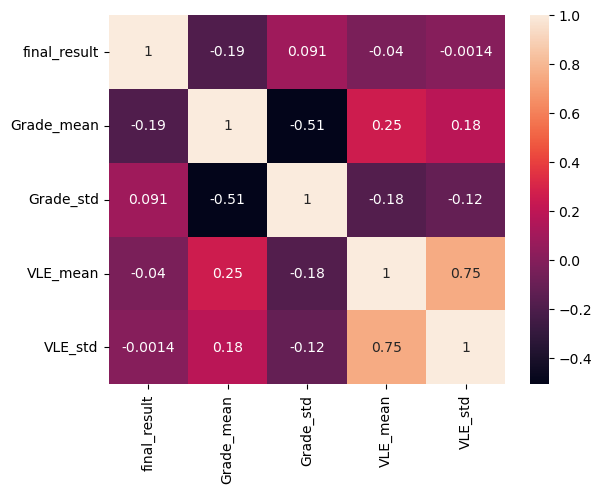

In [68]:
# plotting correlation heatmap 
dataplot = sb.heatmap(full_Dataset.corr(), annot=True) 

# Import package for plotting data
import matplotlib.pyplot as plt

# displaying heatmap 
plt.show() 

# Creating the Training, Testing and Validation Datasets

### NOTE:

The metric that I have chosen to use if F1-score. This is the harmonic mean between precision and recall and a better metric for this problem

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [72]:
X = np.array(full_Dataset.drop(['final_result'],axis=1))
X.shape[1]

4

In [73]:
X.dtype

dtype('float64')

In [74]:
y = np.array(full_Dataset['final_result'])
y.shape

(23229,)

In [75]:
y.dtype

dtype('int32')

## Scaling the data

### Information

First look at histograms of the data

(array([2.0683e+04, 2.3650e+03, 1.3700e+02, 2.7000e+01, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([8.83883476e-02, 3.09504326e+01, 6.18124769e+01, 9.26745211e+01,
        1.23536565e+02, 1.54398610e+02, 1.85260654e+02, 2.16122698e+02,
        2.46984742e+02, 2.77846787e+02, 3.08708831e+02, 3.39570875e+02,
        3.70432920e+02, 4.01294964e+02, 4.32157008e+02, 4.63019052e+02,
        4.93881097e+02, 5.24743141e+02, 5.55605185e+02, 5.86467229e+02,
        6.17329274e+02]),
 <BarContainer object of 20 artists>)

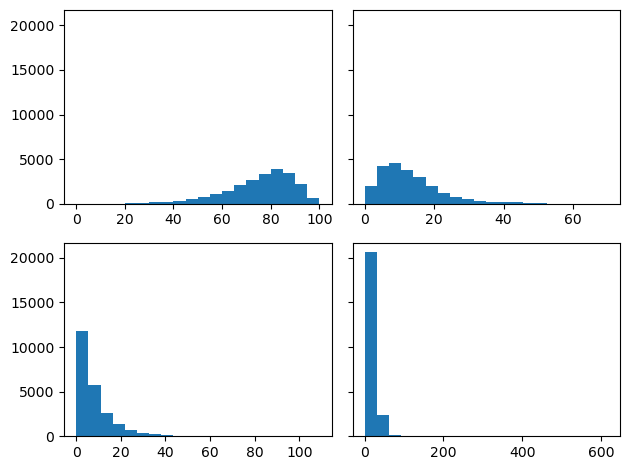

In [78]:
n_bins = 20

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0,0].hist(X[:,0], bins=n_bins)
axs[0,1].hist(X[:,1], bins=n_bins)
axs[1,0].hist(X[:,2], bins=n_bins)
axs[1,1].hist(X[:,3], bins=n_bins)


### Information

It is better to scale the input data in the range [0,1]. This is to ensure that no feature dominates over others, and the features are equally weighted.

**NOTE:** No need to scale the labels since they are already 0 or 1

In [80]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [82]:
X = scaler.transform(X)

(array([2.0683e+04, 2.3650e+03, 1.3700e+02, 2.7000e+01, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

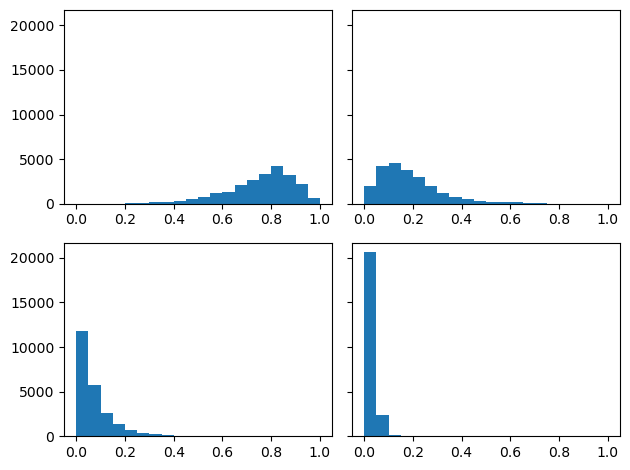

In [83]:
n_bins = 20

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0,0].hist(X[:,0], bins=n_bins)
axs[0,1].hist(X[:,1], bins=n_bins)
axs[1,0].hist(X[:,2], bins=n_bins)
axs[1,1].hist(X[:,3], bins=n_bins)

### Informaiton
Here I have gone for a 70:30 split between training data and validation data

In [85]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [86]:
print('Percentage of withdrawn students in training dataset is:',np.sum(y_train)/len(y_train),
'\n Percentage of withdrawn students in validation dataset is:',np.sum(y_val)/len(y_val))

Percentage of withdrawn students in training dataset is: 0.17484624846248462 
 Percentage of withdrawn students in validation dataset is: 0.16659492036160137


### Information

There are similar number of students that have withdrawn in both the training and validation datasets

Create a Dataframe to store the overal metrics from each model

In [89]:
summary = pd.DataFrame(columns=['Model', 'F1-score (train)', 'F1-score (val)', 'Optimisation Time', 'Train Time','Run Time'])
summary

,Model,F1-score (train),F1-score (val),Optimisation Time,Train Time,Run Time


### Information

This code will be used to time the execution of the code as another performance metric

In [91]:
import time
tic = time.perf_counter()

In [92]:
toc = time.perf_counter()

In [93]:
toc-tic

0.02080069999828993

### Information

To tune the hyperparameters for each of my models I will use grid search

In [95]:
# Import the packages for grid search
from sklearn.model_selection import GridSearchCV 


### Information

I have chosen to use the F1-score as my metric and to optimise the models.

I have chosen this for a few reasons. First, my data set is imbalenced, therefore accuracy is not appropriate.
Secondly, from a practical point of view the resource to intevene with students is finite, therefore using on studnets that don't need it (False Positive) or missing stundents that do need it (False Negative) is detrimental. F1-score is a combination of these and therefore a good metric for this problem.

In [97]:
# Import the metrics to determine best combination of parameters
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

# Model 0: Naive Model

Here I will create a naive model in order to bench mark my other models.

In [99]:
# Import package to create anive model
from sklearn.dummy import DummyClassifier

### Information

I have chosen to use the stratified strategy to create the naive model. This 'model' will ignore the input features and make predictions.

The preditions will be a random probability of a 0 or 1, based on the prior distribution on in the origional y labels 

In [101]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, y)
DummyClassifier(strategy='stratified')
naive_y_pred = dummy_clf.predict(X)

naive_f1_score = f1_score(y, naive_y_pred)
print('Decision Treee F1-score: %.2f' % (naive_f1_score))

Decision Treee F1-score: 0.17


In [102]:
summary.loc[len(summary.index)] = ['Naive', 'N/A', naive_f1_score, 'N/A', 'N/A', 'N/A'] 
summary

,Model,F1-score (train),F1-score (val),Optimisation Time,Train Time,Run Time
0,Naive,N/A,0.170412,N/A,N/A,N/A


# Model 1: Decision Trees

In [104]:
from sklearn import tree, ensemble

In [105]:
# Define the parameter range to search
DT_param_grid = {'max_depth': range(1,30)}  

# Create the grid search model
DT_grid = GridSearchCV(tree.DecisionTreeClassifier(), DT_param_grid, refit = True, verbose = 3,scoring=f1) 



In [106]:
# fitting the model for grid search 
tic = time.perf_counter()

DT_grid.fit(X_train, y_train) 

toc = time.perf_counter()
DT_opt_time = toc - tic

Fitting 5 folds for each of 29 candidates, totalling 145 fits
[CV 1/5] END .......................max_depth=1;, score=0.452 total time=   0.0s
[CV 2/5] END .......................max_depth=1;, score=0.452 total time=   0.0s
[CV 3/5] END .......................max_depth=1;, score=0.452 total time=   0.0s
[CV 4/5] END .......................max_depth=1;, score=0.452 total time=   0.0s
[CV 5/5] END .......................max_depth=1;, score=0.452 total time=   0.0s
[CV 1/5] END .......................max_depth=2;, score=0.452 total time=   0.0s
[CV 2/5] END .......................max_depth=2;, score=0.452 total time=   0.0s
[CV 3/5] END .......................max_depth=2;, score=0.476 total time=   0.0s
[CV 4/5] END .......................max_depth=2;, score=0.452 total time=   0.0s
[CV 5/5] END .......................max_depth=2;, score=0.452 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.452 total time=   0.0s
[CV 2/5] END .......................max_depth=3

In [107]:
# print best parameter after tuning 
print(DT_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(DT_grid.best_estimator_) 

{'max_depth': 27}
DecisionTreeClassifier(max_depth=27)


In [108]:
# Create a new model using the best parameters from the optimisation
DT_opt = DT_grid.best_estimator_

In [109]:
# fitting the model for grid search 
tic = time.perf_counter()

DT_opt.fit(X_train, y_train) 

toc = time.perf_counter()
DT_train_time = toc - tic

In [110]:
# Run the model on the training dataset
tic = time.perf_counter()
DT_y_pred =  DT_opt.predict(X_train)
toc = time.perf_counter()

DT_run_time = toc - tic

# Find F1-score of entire dataset
DT_f1_score_train = f1_score(y_train, DT_y_pred)
print('Decision Treee F1-score: %.2f' % (DT_f1_score_train))

Decision Treee F1-score: 0.96


In [111]:
# Run the model on the validation dataset
DT_y_pred =  DT_opt.predict(X_val)


# Find F1-score of entire dataset
DT_f1_score_val = f1_score(y_val, DT_y_pred)
print('Decision Treee F1-score: %.2f' % (DT_f1_score_val))

Decision Treee F1-score: 0.48


In [112]:
summary.loc[len(summary.index)] = ['DT', DT_f1_score_train, DT_f1_score_val,DT_opt_time,DT_train_time,DT_run_time] 
summary

,Model,F1-score (train),F1-score (val),Optimisation Time,Train Time,Run Time
0,Naive,N/A,0.170412,N/A,N/A,N/A
1,DT,0.963567,0.483910,10.028604,0.087983,0.007559


## Initial comments

- The final F1-score is good.
- The optimisation and run-time is quick
- However, the tree depth is high, there is a danger that this model is over-fitted and may not work well on future datasets.

# Model 2: Support Vector Machine Learning

In [115]:
# Import the data sets needed
from sklearn import svm

In [116]:
# dDefine the parameter range to search
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['sigmoid']}  

# Import the metrics to determine best combination of parameters
from sklearn.metrics import f1_score, make_scorer
f1 = make_scorer(f1_score , average='macro')

# Create the grid search model
SVM_grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,scoring=f1) 



In [117]:
# fitting the model for grid search 
tic = time.perf_counter()

SVM_grid.fit(X_train, y_train) 

toc = time.perf_counter()
SVM_opt_time = toc - tic

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.498 total time=   2.5s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.495 total time=   2.1s
[CV 3/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.490 total time=   2.3s
[CV 4/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.490 total time=   1.7s
[CV 5/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.495 total time=   1.8s
[CV 1/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.452 total time=   1.5s
[CV 2/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.452 total time=   2.2s
[CV 3/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.452 total time=   2.7s
[CV 4/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.452 total time=   2.4s
[CV 5/5] END ..C=0.1, gamma=0.1, kernel=sigmoid;, score=0.452 total time=   1.8s
[CV 1/5] END .C=0.1, gamma=0.01, kernel=sigmoid;, score=0.452 total time=   2.5s
[CV 2/5] END .C=0.1, gamma=0.01, kernel=sigmoid

In [118]:
# print best parameter after tuning 
print(SVM_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(SVM_grid.best_estimator_) 

{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}
SVC(C=1000, gamma=0.1, kernel='sigmoid')


In [119]:
# Create a model using the best parameters
SVM_opt = SVM_grid.best_estimator_

# Train the model
tic = time.perf_counter()

SVM_opt.fit(X_train, y_train)

toc = time.perf_counter()
SVM_train_time = toc - tic

In [120]:
# Run the model on the training dataset
tic = time.perf_counter()
SVM_y_pred =  SVM_opt.predict(X_train)
toc = time.perf_counter()

SVM_run_time = toc - tic

# Find F1-score of entire dataset
SVM_f1_score_train = f1_score(y_train, SVM_y_pred)
print('SVM F1-score: %.2f' % (SVM_f1_score_train))

SVM F1-score: 0.21


In [121]:
# Run the model on the validation dataset
SVM_y_pred =  SVM_opt.predict(X_val)


# Find F1-score of entire dataset
SVM_f1_score_val = f1_score(y_val, SVM_y_pred)
print('SVM F1-score: %.2f' % (SVM_f1_score_val))

SVM F1-score: 0.19


In [122]:
summary.loc[len(summary.index)] = ['SVM', SVM_f1_score_train, SVM_f1_score_val,SVM_opt_time,SVM_train_time,SVM_run_time] 
summary

,Model,F1-score (train),F1-score (val),Optimisation Time,Train Time,Run Time
0,Naive,N/A,0.170412,N/A,N/A,N/A
1,DT,0.963567,0.483910,10.028604,0.087983,0.007559
2,SVM,0.212054,0.193813,290.282018,3.15476,1.456959


# Model 3: KNN

Here I will optimise a KNN model to predict student dropout.

In [125]:
# Initialise packages
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [126]:
# defining parameter range 
param_grid = {'n_neighbors' : range(1, 30),
    'weights': ['uniform', 'distance']}  


# Define the grid search
KNN_grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid,
                    verbose = 3,
                    scoring=f1) 

In [127]:
# Fit the grid_search model on training data
tic = time.perf_counter()

KNN_grid.fit(X_train, y_train)

toc = time.perf_counter()
KNN_opt_time = toc - tic

Fitting 5 folds for each of 58 candidates, totalling 290 fits
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.672 total time=   0.0s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.679 total time=   0.0s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.684 total time=   0.0s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.640 total time=   0.0s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.653 total time=   0.0s
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.672 total time=   0.0s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.679 total time=   0.0s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.684 total time=   0.0s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.640 total time=   0.0s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.653 total time=   0.0s
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.558 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform

In [128]:
# print best parameter after tuning 
print(KNN_grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(KNN_grid.best_estimator_) 

{'n_neighbors': 17, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=17, weights='distance')


In [129]:
# Create a new model using the best parameters from the optimisation
KNN_opt = KNN_grid.best_estimator_

In [130]:
# Train model on training data
tic = time.perf_counter()

KNN_opt.fit(X_train, y_train)

toc = time.perf_counter()
KNN_train_time = toc - tic

In [131]:
# Run the model on the training dataset
tic = time.perf_counter()

KNN_y_pred =  KNN_opt.predict(X_train)

toc = time.perf_counter()
KNN_run_time = toc - tic

# Find F1-score of entire dataset
KNN_f1_score_train = f1_score(y_train, KNN_y_pred)
print('KNN F1-score: %.2f' % (KNN_f1_score_train))

KNN F1-score: 1.00


In [132]:
# Run the model on the validation dataset
KNN_y_pred =  KNN_opt.predict(X_val)


# Find F1-score of entire dataset
KNN_f1_score_val = f1_score(y_val, KNN_y_pred)
print('SVM F1-score: %.2f' % (KNN_f1_score_val))

SVM F1-score: 0.60


In [133]:
summary.loc[len(summary.index)] = ['KNN', KNN_f1_score_train, KNN_f1_score_val, KNN_opt_time, KNN_train_time, KNN_run_time] 
summary

,Model,F1-score (train),F1-score (val),Optimisation Time,Train Time,Run Time
0,Naive,N/A,0.170412,N/A,N/A,N/A
1,DT,0.963567,0.483910,10.028604,0.087983,0.007559
2,SVM,0.212054,0.193813,290.282018,3.15476,1.456959
3,KNN,1.0,0.597676,26.986634,0.008452,0.144477


# Model 4: Neural Network

In [135]:
# Import packaged to create Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import tensor
from torchmetrics import F1Score


In [136]:
# Create function for calculating F1-score from tensors
f1 = F1Score(task='binary',threshold=0.5)

In [137]:
Layer1_nodes = 10
Layer2_nodes = 10

In [138]:
# Convert Numpy to tensors
X_NN = torch.tensor(X, dtype=torch.float32)
y_NN = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [139]:
# Convert Numpy to tensors
X_train_NN = torch.tensor(X_train, dtype=torch.float32)
y_train_NN = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

In [140]:
# Convert Numpy to tensors
X_val_NN = torch.tensor(X_val, dtype=torch.float32)
y_val_NN = torch.tensor(y_val, dtype=torch.float32).reshape(-1, 1)

In [141]:
# Define the Neural Network
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Input layer of 4 nodes connected to n-nodes in hidden first layer
        self.layer1 = nn.Linear(4, Layer1_nodes)
        # Using ReLU activation function
        self.act1 = nn.ReLU()
        # First hidden layer connected to n-nodes in second hidden layer
        self.layer2 = nn.Linear(Layer1_nodes, Layer2_nodes)
        # Using ReLU activation function
        self.act2 = nn.ReLU()
        # Second hidden layer connected to 1 output node
        self.output = nn.Linear(Layer2_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.layer1(x))
        x = self.act2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

In [142]:
# Import the packages to optimise
import torch.optim as optim
import tqdm
import copy



In [143]:
# Create the loss function
class FScoreLoss(torch.nn.Module):
    def __init__(self, eps=1e-7):
        super().__init__()
        self.eps = eps
        
    def forward(self, y_true, y_pred, beta, grad=True):
        tp = (y_true * y_pred).sum().to(torch.float32)
        fn = ((1 - y_true) * y_pred).sum().to(torch.float32)
        fp = (y_true * (1 - y_pred)).sum().to(torch.float32)
        precision = tp / (tp + fp + self.eps)
        recall = tp / (tp + fn + self.eps)

        f_score_loss = (1 + beta ** 2) * (precision * recall) / ((beta**2)*precision + recall + self.eps)
        
        return f_score_loss

        # tp = torch.sum((y_true * y_pred).float(), dim=0)
        # tn = torch.sum(((1 - y_true) * (1 - y_pred)).float(), dim=0)
        # fp = torch.sum(((1 - y_true) * y_pred).float(), dim=0)
        # fn = torch.sum((y_true * (1 - y_pred)).float(), dim=0)

        # p = tp / (tp + fp + 1e-7)
        # r = tp / (tp + fn + 1e-7)

        # f1 = 2 * p * r / (p + r + 1e-7)
        # f1 = torch.where(torch.isnan(f1), torch.zeros_like(f1), f1)
        # return 1 - torch.mean(f1)

In [144]:
# Define a function to train the model
def model_train(model, X_train, y_train, X_val, y_val):
    # Define Loss function
    #loss_fn = nn.BCELoss()  # binary cross entropy
    loss_fn = FScoreLoss()
    # Define optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    
    n_epochs = 50   # number of epochs to run
    batch_size = 1000  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)

    # Hold the best model
    best_f1 = - np.inf   # init to negative infinity
    best_weights = None

    for epoch in range(n_epochs):
        train_tic = time.perf_counter()
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                # Calculate loss
                #loss = loss_fn(y_pred, y_batch)
                loss = loss_fn(y_batch, y_pred, beta=2., grad=True)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(loss)
                )
        # Evaluate F1-score at the end of each epoch
        model.eval()
        y_pred = model(X_val)
        f1Score = f1(y_pred, y_val).detach().numpy()

        train_toc = time.perf_counter()

        if f1Score > best_f1:
            best_f1 = f1Score
            best_weights = copy.deepcopy(model.state_dict())
            NN_train_time = train_toc - train_tic
            
        #print('Epoch =',epoch,'Accuracy=', acc,'F1=',f1Score)
    # restore model and return best accuracy
    model.load_state_dict(best_weights)
    return best_f1, best_weights, NN_train_time

In [145]:
Layer1_nodes_range = Layer2_nodes_range = [4,5,6,7,8,9,10]

best_tot_f1 = - np.inf   # init to negative infinity
best_tot_weights = None
best_Layer1 = - np.inf
best_Layer2 = - np.inf

tic = time.perf_counter()

for i in Layer1_nodes_range:
    Layer1_nodes = i
    for j in Layer2_nodes_range:
        Layer2_nodes = j
        model = NeuralNet()
        #print(model)
        best_f1, best_weights, NN_train_time = model_train(model, X_train_NN, y_train_NN, X_val_NN, y_val_NN)
        print("Layer 1 Nodes =", i,"Layer 2 Nodes =", j, 'F1 score =',best_f1)
        if best_f1 > best_tot_f1:
            best_tot_f1 = best_f1
            best_tot_weights = best_weights
            best_Layer1 = i
            best_Layer2 = j
            NN_train_time = NN_train_time
            
toc = time.perf_counter()
NN_opt_time = toc - tic
 

Layer 1 Nodes = 4 Layer 2 Nodes = 4 F1 score = 0.0
Layer 1 Nodes = 4 Layer 2 Nodes = 5 F1 score = 0.28560886
Layer 1 Nodes = 4 Layer 2 Nodes = 6 F1 score = 0.28560886
Layer 1 Nodes = 4 Layer 2 Nodes = 7 F1 score = 0.28560886
Layer 1 Nodes = 4 Layer 2 Nodes = 8 F1 score = 0.28560886
Layer 1 Nodes = 4 Layer 2 Nodes = 9 F1 score = 0.3036757
Layer 1 Nodes = 4 Layer 2 Nodes = 10 F1 score = 0.0
Layer 1 Nodes = 5 Layer 2 Nodes = 4 F1 score = 0.0
Layer 1 Nodes = 5 Layer 2 Nodes = 5 F1 score = 0.28694713
Layer 1 Nodes = 5 Layer 2 Nodes = 6 F1 score = 0.2859958
Layer 1 Nodes = 5 Layer 2 Nodes = 7 F1 score = 0.12871288
Layer 1 Nodes = 5 Layer 2 Nodes = 8 F1 score = 0.0
Layer 1 Nodes = 5 Layer 2 Nodes = 9 F1 score = 0.0
Layer 1 Nodes = 5 Layer 2 Nodes = 10 F1 score = 0.28560886
Layer 1 Nodes = 6 Layer 2 Nodes = 4 F1 score = 0.0
Layer 1 Nodes = 6 Layer 2 Nodes = 5 F1 score = 0.0
Layer 1 Nodes = 6 Layer 2 Nodes = 6 F1 score = 0.28560886
Layer 1 Nodes = 6 Layer 2 Nodes = 7 F1 score = 0.29117528
Layer

In [146]:
print("Best Layer 1 Nodes =", best_Layer1,"Best Layer 2 Nodes =", best_Layer2, 'Best F1 score =',best_tot_f1)

Best Layer 1 Nodes = 4 Best Layer 2 Nodes = 9 Best F1 score = 0.3036757


In [147]:
# Calculate F1 score on training set

Layer1_nodes = best_Layer1
Layer2_nodes = best_Layer2

model = NeuralNet()
model.load_state_dict(best_tot_weights)

tic = time.perf_counter()

NN_y_pred = model(X_train_NN)

toc = time.perf_counter()
NN_run_time = toc - tic

NN_f1_score_train = f1(NN_y_pred,y_train_NN)
print('SVM F1-score: %.2f' % (NN_f1_score_train))

SVM F1-score: 0.30


In [148]:
# Calculate F1 score on validation set
NN_y_pred = model(X_val_NN)
NN_f1_score_val = f1(NN_y_pred,y_val_NN)
print('SVM F1-score: %.2f' % (NN_f1_score_val))

SVM F1-score: 0.30


In [149]:
summary.loc[len(summary.index)] = ['NN', NN_f1_score_train.numpy(), NN_f1_score_val.numpy(), NN_opt_time, NN_train_time, NN_run_time] 
summary

,Model,F1-score (train),F1-score (val),Optimisation Time,Train Time,Run Time
0,Naive,N/A,0.170412,N/A,N/A,N/A
1,DT,0.963567,0.48391,10.028604,0.087983,0.007559
2,SVM,0.212054,0.193813,290.282018,3.15476,1.456959
3,KNN,1.0,0.597676,26.986634,0.008452,0.144477
4,NN,0.30122542,0.3036757,81.083282,0.040958,0.00175
